In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, SCORERS
from sklearn.model_selection import cross_val_score
#sorted(sklearn.metrics.SCORERS.keys())
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [0]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix'   # note / in from because we did not mount

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/dw_matrix # note / in from because we did not mount'
/content


In [0]:
%pwd

'/content'

In [0]:
cd 'drive/My Drive/Colab Notebooks/dw_matrix'

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean(df.prices_amountmin)
mean_price

93.53952188183217

In [0]:
[7] * 3

[7, 7, 7]

In [0]:
y_true = df.prices_amountmin
y_pred = [mean_price] * y_true.shape[0]

In [0]:
mean_absolute_error(y_true, y_pred)

63.968341227870624

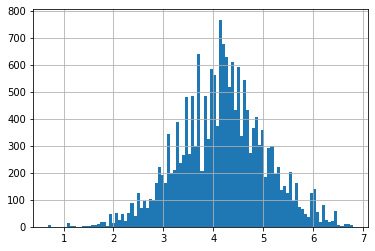

In [0]:
#np.log( y_true +1 ).hist(bins=100)
np.log1p( y_true +1 ).hist(bins=100) 

In [0]:
np.log(0)
np.log(0 +1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


0.0

In [0]:
# median is better then mean value
y_pred = [np.median(y_true)] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
# log-exp transform
# m: log is symetric so less outliers
#price_log_mean = np.exp( np.mean( np.log1p(y_true) ) ) -1
price_log_mean = np.expm1( np.mean( np.log1p(y_true) ) )
y_pred = [price_log_mean] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df.brand.value_counts()

Nike                      1709
PUMA                       574
Ralph Lauren               524
New Balance                361
VANS                       356
                          ... 
Covona                       1
Surplus                      1
Kirkland Signature           1
Silver Elements Charms       1
Banuce                       1
Name: brand, Length: 1856, dtype: int64

In [0]:
def run_model(features):
  X = df[features].values
  y = df.prices_amountmin.values
  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
df['brand_cat'] = df.brand.factorize()[0] # assign ids
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df.features.value_counts()

[{"key":"Gender","value":["Unisex"]},{"key":"Polarized Lenses","value":["Non-polarized lenses"]}]                                                                                                                                                                                                                                                                                          83
[{"key":"Shipping Weight (in pounds)","value":["3.0"]}]                                                                                                                                                                                                                                                                                                                                    78
[{"key":"Sport","value":["Soccer"]},{"key":"Condition","value":["New with box"]},{"key":"Type","value":["Cleats"]}]                                                                                                                         

In [87]:
df["features_cat"] = df.features.factorize()[0]
run_model(['features_cat', 'brand_cat'])

(-58.14610679711173, 4.650059633901865)

In [88]:
%pwd

'/content/drive/My Drive/Colab Notebooks/dw_matrix'

In [89]:
%ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [90]:
cd matrix_one/

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_one


In [91]:
ls

DAY3.ipynb  DAY4.ipynb


In [94]:
!git status


On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   ../HelloGithub.ipynb
	modified:   DAY3.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	DAY4.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git add DAY3.ipynb DAY4.ipynb

In [96]:
!git commit -m "update DAY3 and add new DAY4"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@51b6c97dc05e.(none)')


In [0]:
!git config --global gotchas.u@gmail.com

In [0]:
!git config --global user.name "Rafal"

In [99]:
!git pusg

git: 'pusg' is not a git command. See 'git --help'.

The most similar command is
	push


In [100]:
!git push

Everything up-to-date
